In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
remote_file = "https://raw.githubusercontent.com/LearnPythonWithRune/FinancialDataAnalysisWithPython/main/files/AAPL.csv"
data = pd.read_csv(remote_file, index_col=0, parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-27,77.514999,77.942497,76.220001,77.237503,76.576187,161940000
2020-01-28,78.150002,79.599998,78.047501,79.422501,78.742477,162234000
2020-01-29,81.112503,81.962502,80.345001,81.084999,80.390747,216229200
2020-01-30,80.135002,81.022499,79.687500,80.967499,80.274246,126743200
2020-01-31,80.232498,80.669998,77.072502,77.377502,76.714989,199588400


### MACD
- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

**Calculation** (12-26-9 MACD (default))
- MACD=12-Period EMA − 26-Period EMA
- Singal line 9-Perioed EMA of MACD

In [4]:
exp1 = data['Close'].ewm(span=12, adjust=False).mean()
exp2 = data['Close'].ewm(span=26, adjust=False).mean()
data['MACD'] = exp1 - exp2
data['Signal line'] = data['MACD'].ewm(span=9, adjust=False).mean()

In [5]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line
Date,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,132.029999,104319500,1.168345,1.733879
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.869995,120529500,1.653950,1.717893
2021-01-22,136.279999,139.850006,135.020004,139.070007,139.070007,114459400,2.191061,1.812527
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157282400,2.894026,2.028827
2021-01-26,143.600006,144.300003,141.369995,142.080002,142.080002,50388565,3.344794,2.292020


<IPython.core.display.Javascript object>


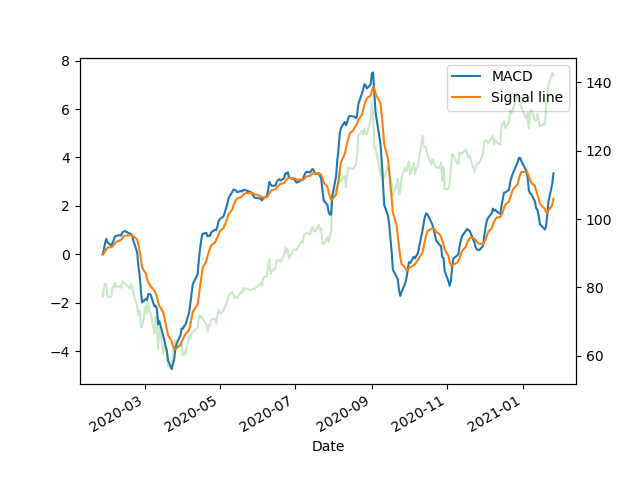

<AxesSubplot:label='bbfe4908-1be4-49c8-94d8-416e80209046'>

In [6]:
fig, ax = plt.subplots()
data[['MACD', 'Signal line']].plot(ax=ax)
data['Close'].plot(ax=ax, alpha=0.25, secondary_y=True)

### Stochastic oscillator
- Lagging indicator
- https://www.investopedia.com/terms/s/stochasticoscillator.asp

**Calculations**
- 14-high: Maximum of last 14 trading days
- 14-low: Minimum of last 14 trading days
- %K: (Last close - 14-low)*100 / (14-high - 14-low)
- %D: Simple Moving Average of %K

In [7]:
high14 = data['High'].rolling(14).max()
low14 = data['Low'].rolling(14).min()
data['%K'] = (data['Close'] - low14)*100/(high14 - low14)
data['%D'] = data['%K'].rolling(3).mean()

In [8]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,MACD,Signal line,%K,%D
Date,,,,,,,,,,
2021-01-20,128.660004,132.490005,128.550003,132.029999,132.029999,104319500,1.168345,1.733879,58.792896,25.533726
2021-01-21,133.800003,139.669998,133.589996,136.869995,136.869995,120529500,1.653950,1.717893,78.931506,49.802857
2021-01-22,136.279999,139.850006,135.020004,139.070007,139.070007,114459400,2.191061,1.812527,94.209365,77.311256
2021-01-25,143.070007,145.089996,136.539993,142.919998,142.919998,157282400,2.894026,2.028827,88.401934,87.180935
2021-01-26,143.600006,144.300003,141.369995,142.080002,142.080002,50388565,3.344794,2.292020,83.912378,88.841226


<IPython.core.display.Javascript object>


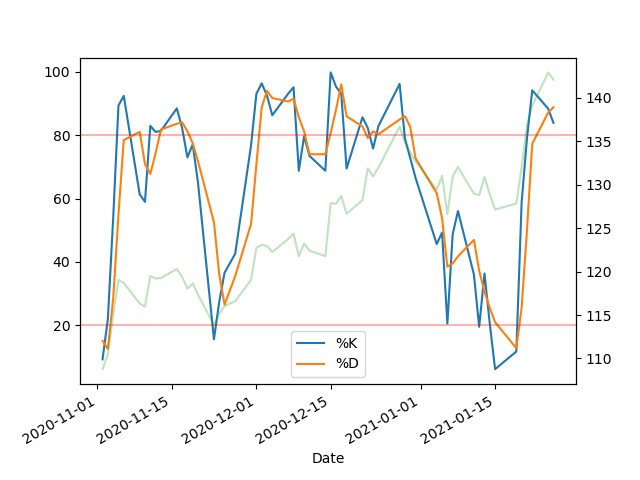

<AxesSubplot:label='db8a6423-4994-4b43-9ad5-a7d05a0c1444'>

In [9]:
fig, ax = plt.subplots()
data[['%K', '%D']].loc['2020-11-01':].plot(ax=ax)
ax.axhline(80, c='r', alpha=0.3)
ax.axhline(20, c='r', alpha=0.3)
data['Close'].loc['2020-11-01':].plot(ax=ax, alpha=0.3, secondary_y=True)

## End